# 이상탐지 알고리즘을 통한 이상거래탐지(FDS)

[JAEHYEONG 님의 포스트](https://jaehyeongan.github.io/2018/06/30/%EC%9D%B4%EC%83%81%ED%83%90%EC%A7%80-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9D%84-%ED%86%B5%ED%95%9C-%EC%9D%B4%EC%83%81%EA%B1%B0%EB%9E%98%ED%83%90%EC%A7%80-FDS/)

<br>

**FDS(Fraud Detection System)**

- 국내 주요 은행들이 부정거래를 막기 위해 도입한 시스템
- 주로 룰(Rule) 기반으로 사람에 의해 이루어짐
- 때문에 실시간으로 정확한 탐지가 어려운 상황

**포스트에서 다룰 내용**

- 머신러닝을 이용하여 부정거래 탐지
- 지도학습이 아닌 **비지도 학습**을 이용
- 그 중 **이상 탐지(Outlier Detection)** 알고리즘을 이용  
  - 라벨을 통한 학습 x 
  - 이상치 데이터 집단을 찾아 그 이상치 집단이 부정거래 데이터와 일치 및 유사한 지 확인

<br>

# 1. 신용카드 데이터 셋

캐글의 [Credit Card 데이터 셋](https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3) 이용

**데이터 셋 설명**

- 2013년 9월 유럽의 실제 신용 카드 거래 데이터
- 총 284,807건 중 492건만이 부정 거래 데이터  
$\rightarrow$ 데이터가 매우 **불균형(imbalanced)**하다.
- 개인정보 비식별화처리로 인해 컬럼 정보를 알 수 없음
- 데이터 또한 스케일(scale) 및 PCA(principal component analysis) 처리 되어 있음
- 총 31개의 컬럼 중 Time, Amount, Class를 제외한 모든 컬럼은 비식별화처리 되어 있음

In [1]:
import pandas as pd

In [23]:
credit_data = pd.read_csv('./data/FDS_outlier_detection/creditcard.csv')

In [24]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<br>

# 2. EDA

## 2.1 Time

시간(Time)대별 정상/부정 거래 비율

$\rightarrow$ 정상 거래 : 시간에 따라 주기적  
$\rightarrow$ 부정 거래 : 불규칙한 특성을 보임

## 2.2 Amount

금액(Amount)대별 정상/부정 거래 비율

$\rightarrow$ 정상 거래 : 다양한 금액대에서 발생  
$\rightarrow$ 부정 거래 : 적은 금액에서 주로 발생

## 2.3 V1 ~ V28

비식별 컬럼 정상/부정거래 비율  
특성 차이가 심한 일부 변수(V11, V12, V13, V14)만 표시

<br>


# 3. Isolation Forest

이상 탐지 알고리즘으로 **Isolation Forest** 알고리즘 이용

**Isolation Forest**

- Tree 기반으로 데이터를 나누어 데이터의 관측치를 고립시키는알고리즘
- 이상 데이터의 경우 root node와 가까운 depth를 가짐
- 정상 데이터의 경우 tree의 말단 노드에 가까운 depth를 가짐

<div style="text-align: left; margin-left: 30px;">
    <img src="./images/FDS_outlier_Detection/img001.jpg" width="400px"/>
</div>

<br>

# 4. 이상 탐지 알고리즘 적용

Isolation Forest 알고리즘은 `sklearn.ensemble.IsolationForest` 를 통해 사용할 수 있음

Isolation Forest는 이상치 점수(outlier score)를 제공  
정상 거래/ 부정 거래에 대한 이상치 점수를 확인해보면 분포에 정상/부정 거래 간 비율이 다르게 나타나는 것 확인 가능

<br>

# 5. 적용

적용하기 전, 데이터 불균형(Data Imbalance)를 해결하기 위해, 정상 거래건에 대해 Down sampling 70% 비율로 진행

In [45]:
X = credit_data.drop(['Class'], axis=1)
y = credit_data['Class']
print(y.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [46]:
# Down Sampling
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(ratio=0.70, random_state=0)
X, y = sampler.fit_sample(X, y)
print(pd.Series(y).value_counts())

0    702
1    492
dtype: int64


`IsolationForest`의 파라미터  
  
  
`n_estimators` : 노드 수  
`contamination` : 이상치 비율

In [47]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=300, contamination=0.40, random_state=42)
clf.fit(X)
pred_outlier = clf.predict(X)
pred_outlier = pd.DataFrame(pred_outlier).replace({1:0, -1:1})

C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


이상 탐지 예측값은 1이 정상, -1이 이상으로 분류됨  
이를 Class 라벨과의 오차를 계산해야 되기 때문에 같은 범위로 바꿔줌

<br>

# 6. 예측 결과 시각화

이상탐지 결과를 2d 및 3d로 시각화  
(시각화를 위해 차원 축소 실시)

> 원본 포스트에 차원 축소 내용의 코드가 없어 시각화 결과가 일치하지 않은 것 같습니다.

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [42]:
X.shape

(1194, 30)

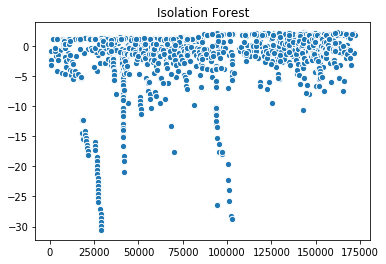

In [48]:
# plot 2d
plt.scatter(X[:,0],
            X[:,1],
            #c=pred_outlier,
            cmap='Paired',
            s=40,
            edgecolors='white')
plt.title("Isolation Forest")
plt.show()

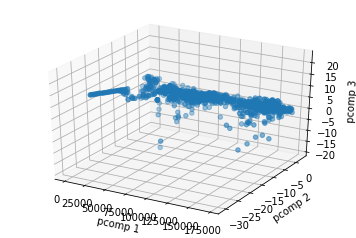

In [52]:
# plot 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2]) # , c=pred_outlier
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

<br>

# 7. 결과

예측값을 실제 부정거래여부 컬럼인 Class와 비교하여 성능 확인

**측정 지표**

- Accuracy(정확도)
- Recall(재현율)
- Precision(정밀도)
- F1-score

금융 거래에서는 정확도도 중요하지만, 실제 부정거래를 부정거래로 예측한 비율은 **Recall(재현율)** 값이 중요하게 여겨집니다.

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import itertools
import numpy as np

In [69]:
class_name = [0, 1]
def plot_confusion_matrix(classes, pred, y_test, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues) :
    cm = confusion_matrix(y_test, pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    if normalize :
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

confusion matrix
 [[595 121]
 [107 371]]

Accuracy 0.8090452261306532

classification_report
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       716
           1       0.75      0.78      0.76       478

    accuracy                           0.81      1194
   macro avg       0.80      0.80      0.80      1194
weighted avg       0.81      0.81      0.81      1194



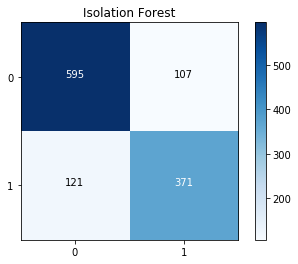

In [70]:
# 평가
print('confusion matrix\n', confusion_matrix(pred_outlier, y))
print('\nAccuracy', accuracy_score(pred_outlier, y))
print('\nclassification_report\n', classification_report(pred_outlier, y))
plot_confusion_matrix(class_name, pred_outlier, y, title='Isolation Forest')

<br>

# 8. Outro

데이터를 목표 변수를 통해 학습하는 지도학습 알고리즘에 비하면 작은 정확도이지만, 데이터를 전혀 학습하지 않고, 데이터의 특성만을 고려하여 이상치를 찾아내는 비지도 학습으로도 충분히 부정 거래를 탐지할 수 있다는 것 확인

최근 딥러닝 기법을 적용하여 **오토인코더(Auto-encoder)**, **GAN 알고리즘**을 이용하여 이상 탐지에 활용되고 있음